# 0.0 IMPORTS

In [93]:
import inflection

import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import seaborn           as sns

from scipy                 import stats as ss
from IPython.core.display  import HTML
from IPython.display       import Image

## 0.1 HELPER FUNCTIONS

In [90]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML('<style>.container { width:100% !important; }</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
     
    sns.set()
    
jupyter_settings()

#Cramer V method for correlation between categorical variables
def cramer_v(x,y): #receive categorical variables as parameters
    cm = pd.crosstab(x,y).to_numpy()
    n = cm.sum()
    r, k = cm.shape
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    
    chi2 = ss.chi2_contingency(cm)[0]
    chi2corr = max(0, chi2 - (k-1)*(r-1)/(n-1))
    
    return np.sqrt((chi2corr/n) / (min(kcorr-1, rcorr-1)))


Populating the interactive namespace from numpy and matplotlib


## 0.2 LOADING DATA

In [3]:
df_raw = pd.read_csv("data/Train.csv", low_memory = False)

# 1.0 DATA DESCRIPTION 

In [4]:
df1 = df_raw.copy()

**ID**: ID Number of Customers.

**Warehouse block**: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.

**Mode of shipment**:The Company Ships the products in multiple way such as Ship, Flight and Road.

**Customer care calls**: The number of calls made from enquiry for enquiry of the shipment.

**Customer rating**: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).

**Cost of the product**: Cost of the Product in US Dollars.

**Prior purchases**: The Number of Prior Purchase.

**Product importance**: The company has categorized the product in the various parameter such as low, medium, high.

**Gender**: Male and Female.

**Discount offered**: Discount offered on that specific product.

**Weight in gms**: It is the weight in grams.

**Reached on time**: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

In [5]:
df1.head(3).append(df1.tail(3))

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


## 1.1 Rename Columns

In [6]:
cols_old = df1.columns

snakecase = lambda x: inflection.underscore(x)

cols_new = list( map(snakecase, cols_old)) 

#rename
df1.columns = cols_new

In [7]:
df1.columns

Index(['id', 'warehouse_block', 'mode_of_shipment', 'customer_care_calls',
       'customer_rating', 'cost_of_the_product', 'prior_purchases',
       'product_importance', 'gender', 'discount_offered', 'weight_in_gms',
       'reached.on.time_y.n'],
      dtype='object')

In [8]:
df1 = df1.set_index('id')

## 1.2 Data Dimensions

In [9]:
print("Number of Rows: {}".format(df1.shape[0]))
print("Number of Columns: {}".format(df1.shape[1]))

Number of Rows: 10999
Number of Columns: 11


## 1.3 Data Types

In [10]:
df1.dtypes

warehouse_block        object
mode_of_shipment       object
customer_care_calls     int64
customer_rating         int64
cost_of_the_product     int64
prior_purchases         int64
product_importance     object
gender                 object
discount_offered        int64
weight_in_gms           int64
reached.on.time_y.n     int64
dtype: object

## 1.4 Check NA

In [11]:
df1.isna().sum()

warehouse_block        0
mode_of_shipment       0
customer_care_calls    0
customer_rating        0
cost_of_the_product    0
prior_purchases        0
product_importance     0
gender                 0
discount_offered       0
weight_in_gms          0
reached.on.time_y.n    0
dtype: int64

## 1.5 Descriptive Statistical

In [12]:
num_columns = ['customer_care_calls', 'cost_of_the_product', 'prior_purchases', 'discount_offered', 'weight_in_gms', 'customer_rating']
cat_columns = ['warehouse_block', 'mode_of_shipment', 'product_importance', 'gender', 'reached.on.time_y.n']
num_attributes = df1[num_columns]
cat_attributes = df1[cat_columns]

print(num_attributes.columns)

print(cat_attributes.columns)


Index(['customer_care_calls', 'cost_of_the_product', 'prior_purchases',
       'discount_offered', 'weight_in_gms', 'customer_rating'],
      dtype='object')
Index(['warehouse_block', 'mode_of_shipment', 'product_importance', 'gender',
       'reached.on.time_y.n'],
      dtype='object')


In [13]:
df1[cat_columns] = df1[cat_columns].astype('category')
print(df1.dtypes)

warehouse_block        category
mode_of_shipment       category
customer_care_calls       int64
customer_rating           int64
cost_of_the_product       int64
prior_purchases           int64
product_importance     category
gender                 category
discount_offered          int64
weight_in_gms             int64
reached.on.time_y.n    category
dtype: object


### 1.5.1 Numerical Attributes

In [14]:
# Central Tendency -media, mediana
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - std, max, min, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

#concatenete
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m. columns = ["attributes", "min", "max", "range", "mean", "median", "std", "skew", "kurtosis"]

m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,customer_care_calls,2.0,7.0,5.0,4.054459,4.0,1.141438,0.391926,-0.308995
1,cost_of_the_product,96.0,310.0,214.0,210.196836,214.0,48.061087,-0.157117,-0.972160
2,prior_purchases,2.0,10.0,8.0,3.567597,3.0,1.522791,1.681897,4.006342
3,discount_offered,1.0,65.0,64.0,13.373216,7.0,16.204790,1.798929,2.000586
4,weight_in_gms,1001.0,7846.0,6845.0,3634.016729,4149.0,1635.302908,-0.249747,-1.447671
5,customer_rating,1.0,5.0,4.0,2.990545,3.0,1.413539,0.004360,-1.295654


### 1.5.2 Categorical Attribute

In [15]:
cat_attributes.apply( lambda x: x.unique() )

warehouse_block             [D, F, A, B, C]
mode_of_shipment       [Flight, Ship, Road]
product_importance      [low, medium, high]
gender                               [F, M]
reached.on.time_y.n                  [1, 0]
dtype: object

### 1.5.3 Feature Engineering

In [75]:
df1["reached.on.time_y.n"] = df1["reached.on.time_y.n"].apply( lambda x: "Yes" if x==0 else "Not")

In [76]:
df1["reached.on.time_y.n"].unique() 

['Not', 'Yes']
Categories (2, object): ['Not', 'Yes']

### 1.5.4 First look

C:\Users\prese\.conda\envs\virtualenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


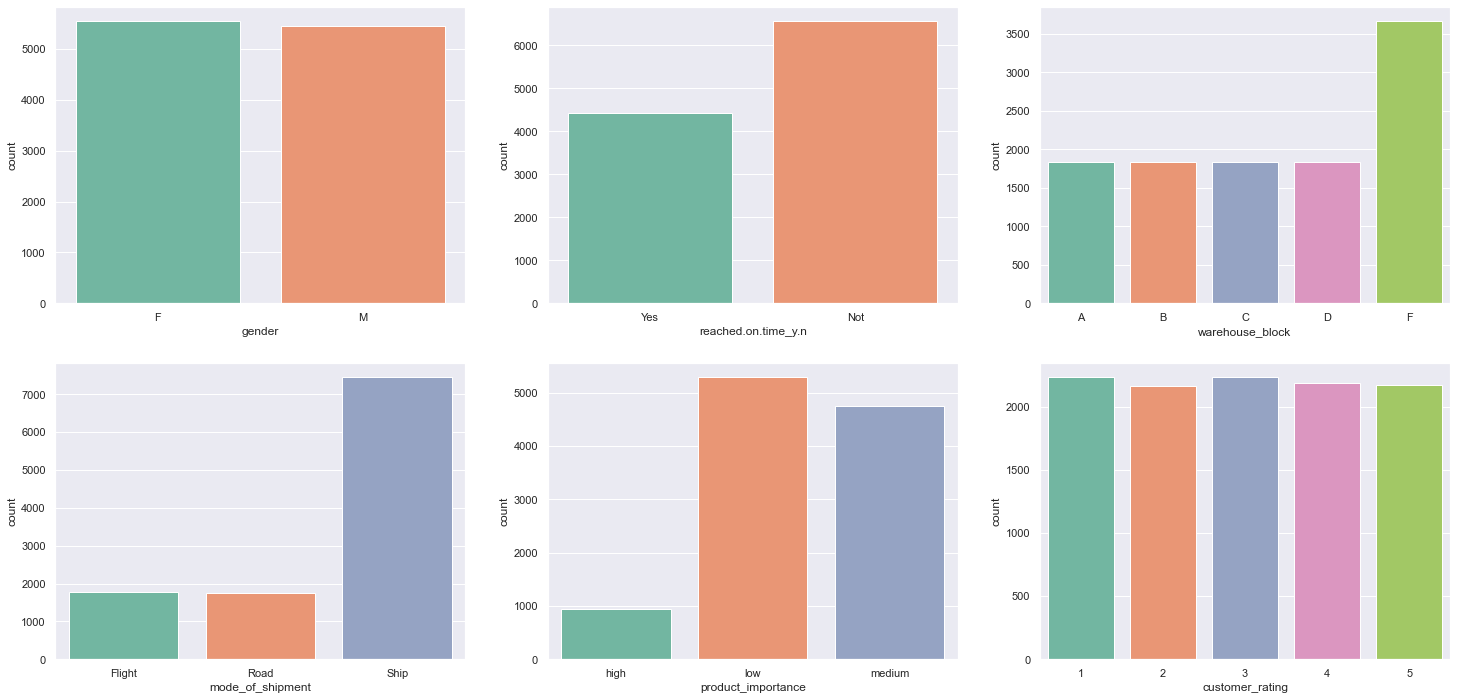

In [88]:
plt.subplot(2, 3, 1)
sns.countplot( df1["gender"] )

plt.subplot(2, 3, 2)
sns.countplot( df1['reached.on.time_y.n'])

plt.subplot(2, 3, 3)
sns.countplot( df1['warehouse_block'])

plt.subplot(2, 3, 4)
sns.countplot( df1["mode_of_shipment"] )

plt.subplot(2, 3, 5)
sns.countplot( df1["product_importance"] )

plt.subplot(2, 3, 6)
sns.countplot( df1["customer_rating"] )

plt.show()

In [17]:
df1['customer_rating'].value_counts(normalize=True, sort=False)


1    0.203200
2    0.196836
3    0.203564
4    0.199018
5    0.197382
Name: customer_rating, dtype: float64

In [18]:
df1['reached.on.time_y.n'].value_counts(normalize=True)

1    0.596691
0    0.403309
Name: reached.on.time_y.n, dtype: float64

# 2.0  CREATING HYPOTHESES

In [77]:
df2=df1.copy()

## 2.1 Mind map of Hypotheses

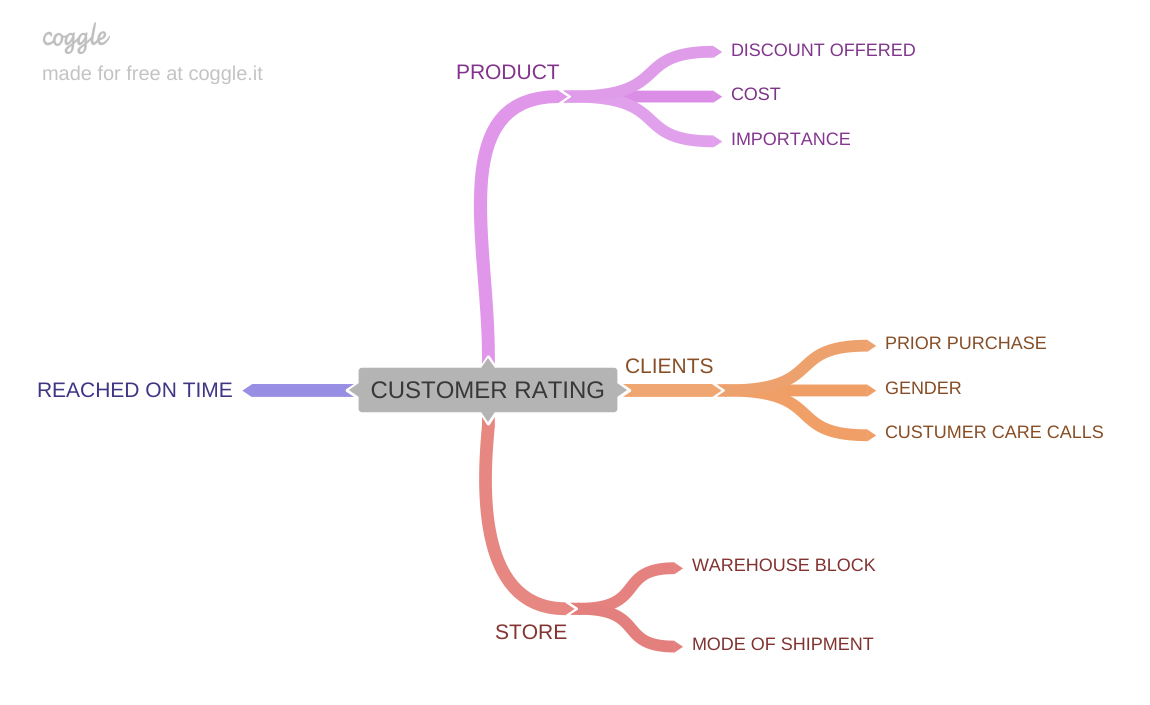

In [20]:
Image("img/MindMapHypothesis.png")

## 2.2 Creating Hypotheses

### 2.2.1 Store

**1.** Flight shipments have better customer ratings

**2.** There are warehouse blocks with better results than the others

### 2.2.2 Clients

**1.** Clients with more prior purchases give better rattings

**2.** Man give better ratings than woman

**3.** Clients with more cutomer calls give worse ratings

### 2.2.3 Product

**1.** When a discount is offered, clients tend to give better ratings

**2.** More expensive products result in worse ratings

**3.** More important products results in better ratings

### 2.2.4 Delivery time

**1.** Products that reach on time have better ratings

# 3.0 EXPLORATORY DATA ANALYSIS

In [78]:
df3 = df2.copy()

## 3.1 Univariate Analysis

### 3.1.1 Response variable

In [22]:
sns.set_palette('Set2')

C:\Users\prese\.conda\envs\virtualenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


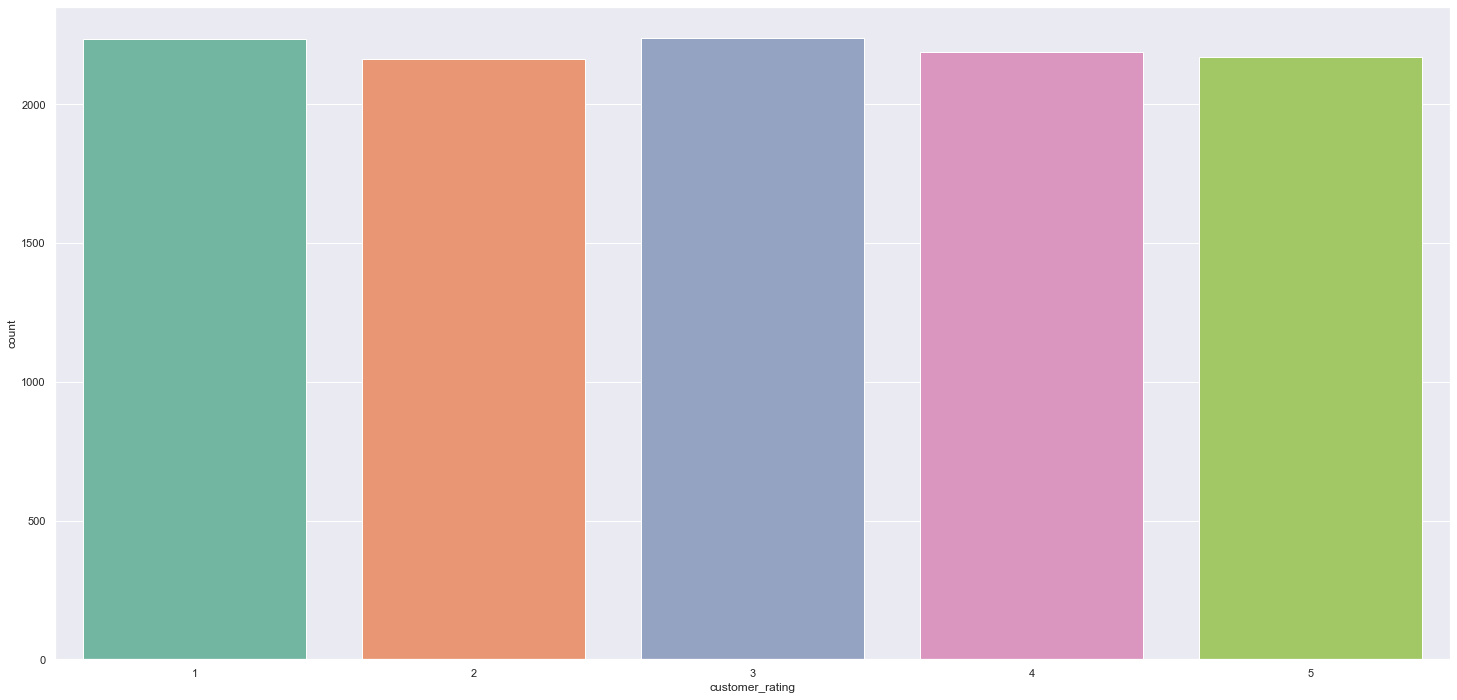

In [23]:
sns.countplot('customer_rating', data = df3 )
plt.show()

### 3.1.2 Numerical variable

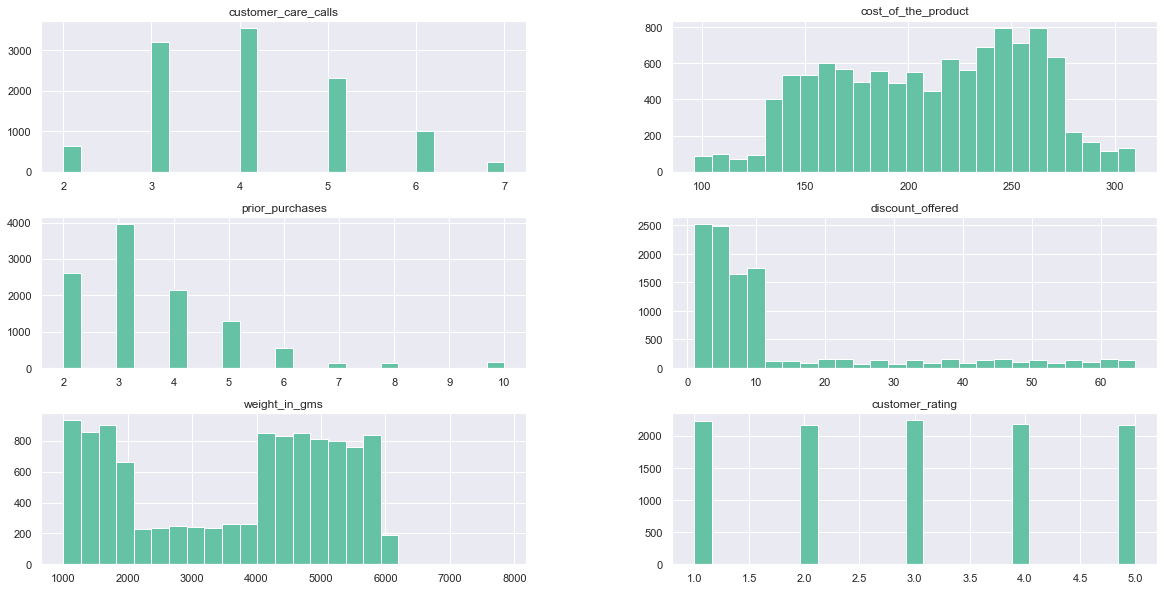

In [24]:
num_attributes.hist( bins=25 , figsize = (20,10));

C:\Users\prese\.conda\envs\virtualenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


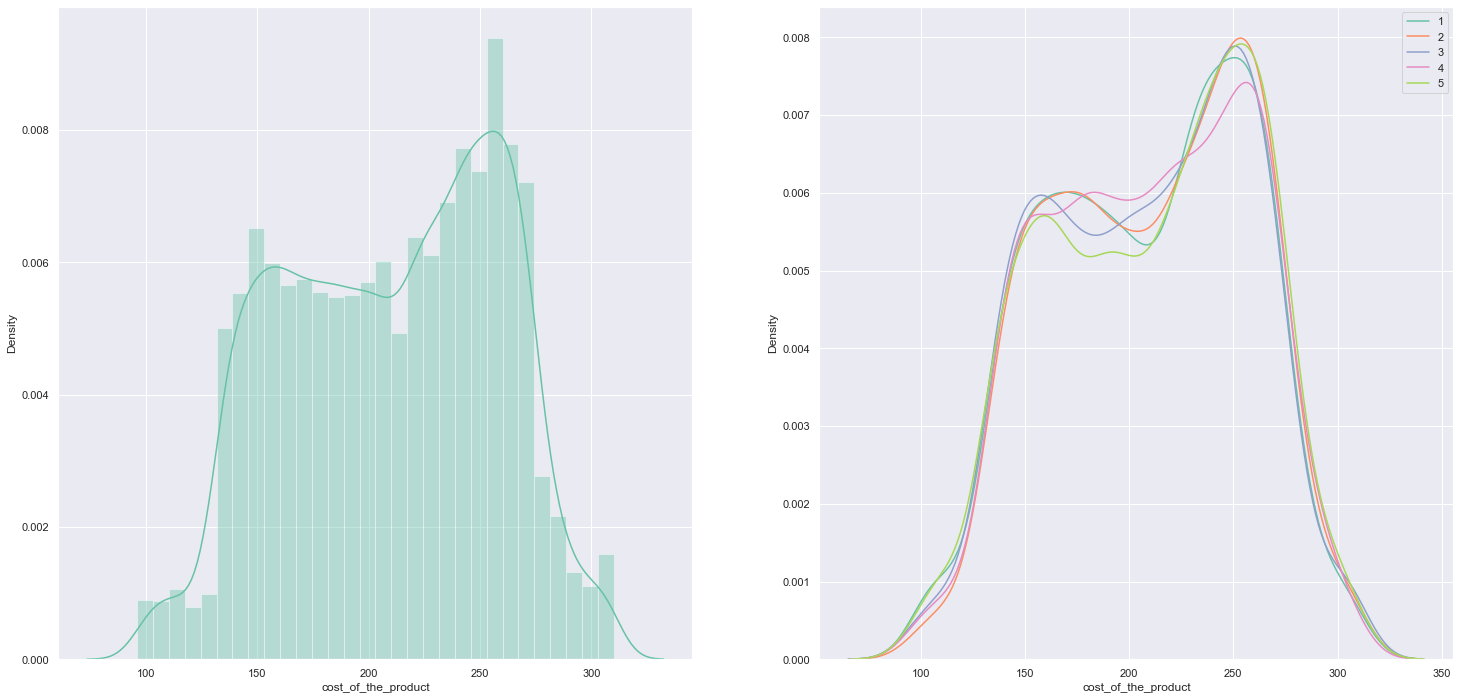

In [25]:
#First look in Cost of the product behavior with the rating of the customer
plt.subplot(1,2,1)
sns.distplot( df3["cost_of_the_product"] )

plt.subplot(1,2,2)
sns.kdeplot( df3[df3["customer_rating"] == 1]["cost_of_the_product"], label = "1")
sns.kdeplot( df3[df3["customer_rating"] == 2]["cost_of_the_product"], label = "2")
sns.kdeplot( df3[df3["customer_rating"] == 3]["cost_of_the_product"], label = "3")
sns.kdeplot( df3[df3["customer_rating"] == 4]["cost_of_the_product"], label = "4")
sns.kdeplot( df3[df3["customer_rating"] == 5]["cost_of_the_product"], label = "5")
plt.legend()

plt.show()

C:\Users\prese\.conda\envs\virtualenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


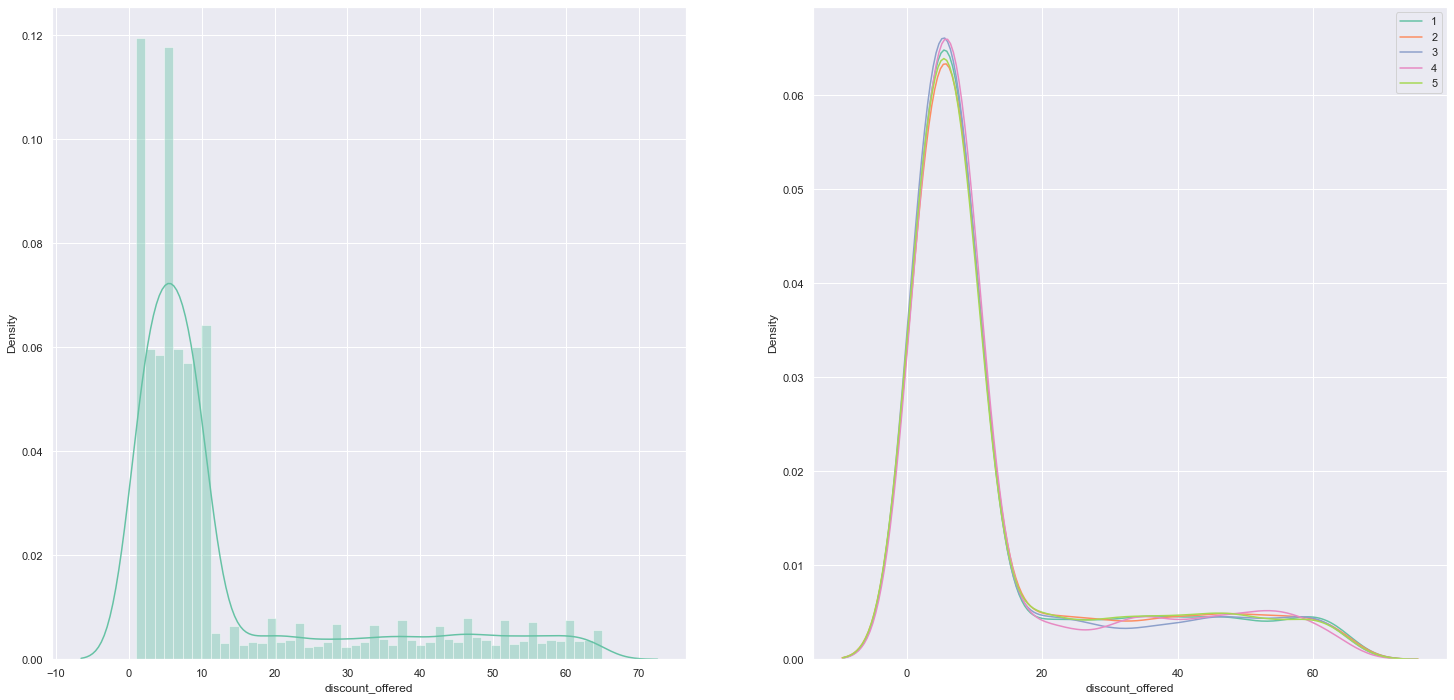

In [26]:
#First look in the behavior of the discount offered with the customer rating
plt.subplot(1,2,1)
sns.distplot( df3["discount_offered"] )

plt.subplot(1,2,2)
sns.kdeplot( df3[df3["customer_rating"] == 1]["discount_offered"], label = "1")
sns.kdeplot( df3[df3["customer_rating"] == 2]["discount_offered"], label = "2")
sns.kdeplot( df3[df3["customer_rating"] == 3]["discount_offered"], label = "3")
sns.kdeplot( df3[df3["customer_rating"] == 4]["discount_offered"], label = "4")
sns.kdeplot( df3[df3["customer_rating"] == 5]["discount_offered"], label = "5")
plt.legend()

### 3.1.3 Categorical Variable

C:\Users\prese\.conda\envs\virtualenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\prese\.conda\envs\virtualenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\prese\.conda\envs\virtualenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warning

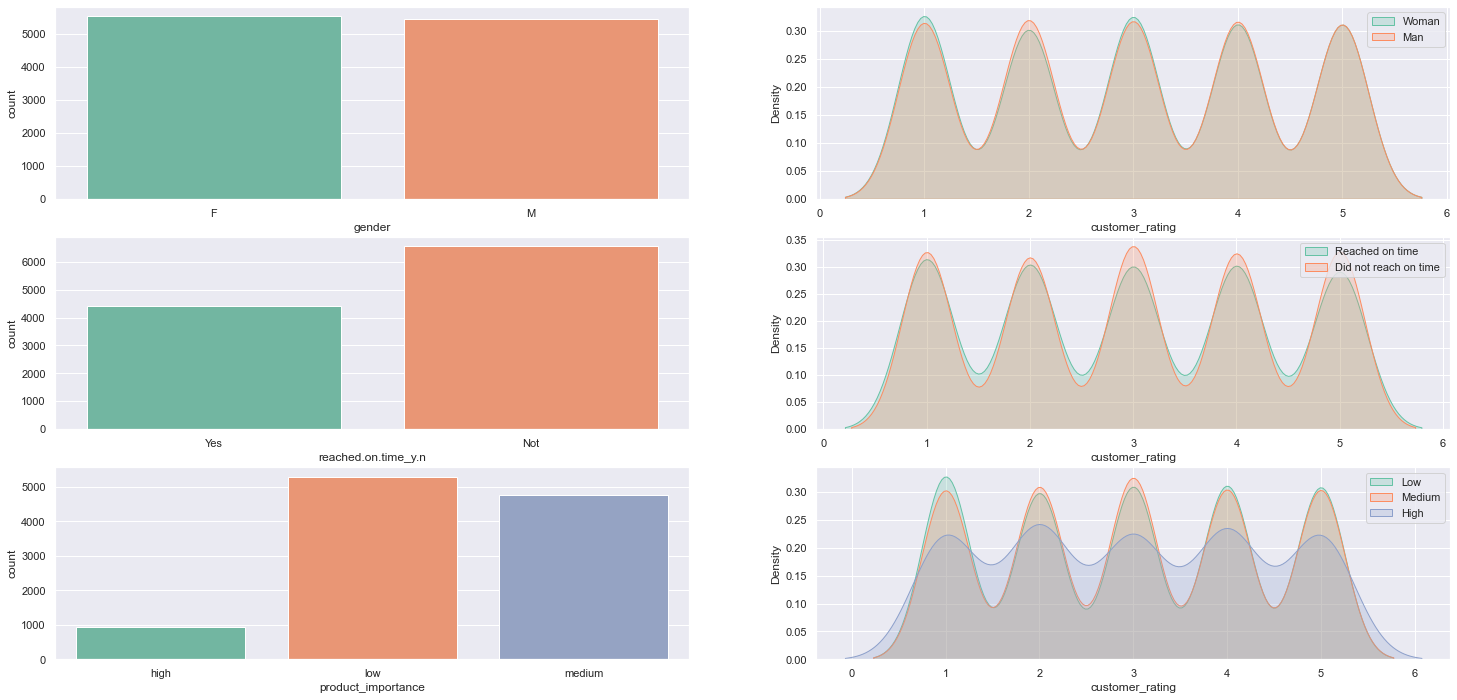

In [87]:
plt.subplot(3,2,1)
sns.countplot( df3["gender"] )


plt.subplot(3,2,2)
sns.kdeplot( df3[df3["gender"] == "F"]["customer_rating"], label = "Woman", shade = True)
sns.kdeplot( df3[df3["gender"] == "M"]["customer_rating"], label = "Man", shade = True)

plt.legend()

#store_type
plt.subplot(3,2,3)
sns.countplot( df3["reached.on.time_y.n"] )

plt.subplot(3,2,4)
sns.kdeplot( df3[df3["reached.on.time_y.n"] == "Yes"]["customer_rating"], label = "Reached on time", shade = True)
sns.kdeplot( df3[df3["reached.on.time_y.n"] == "Not"]["customer_rating"], label = "Did not reach on time", shade = True)

plt.legend()

#assortment	
plt.subplot(3,2,5)
sns.countplot( df3["product_importance"] )

plt.subplot(3,2,6)
sns.kdeplot( df3[df3["product_importance"] == "low"]["customer_rating"], label = "Low", shade = True)
sns.kdeplot( df3[df3["product_importance"] == "medium"]["customer_rating"], label = "Medium", shade = True)
sns.kdeplot( df3[df3["product_importance"] == "high"]["customer_rating"], label = "High", shade = True)
plt.legend()

## 3.2 Analise Bivarida

### H1 - Flight shipments have better customer ratings

**False** There is just a few difference in the custome ratings between the kind of shipment, with a little disvantage for the flight ones when looking to the mean rates. But when we look only for the Excelent Rates (4 or 5) we have a realy small adventege for flight shipments.

1    0.207653
2    0.203714
3    0.185706
4    0.204277
5    0.198649
Name: customer_rating, dtype: float64
1    0.201689
2    0.195122
3    0.209863
4    0.196864
5    0.196462
Name: customer_rating, dtype: float64
1    0.205114
2    0.197159
3    0.194886
4    0.202841
5    0.200000
Name: customer_rating, dtype: float64


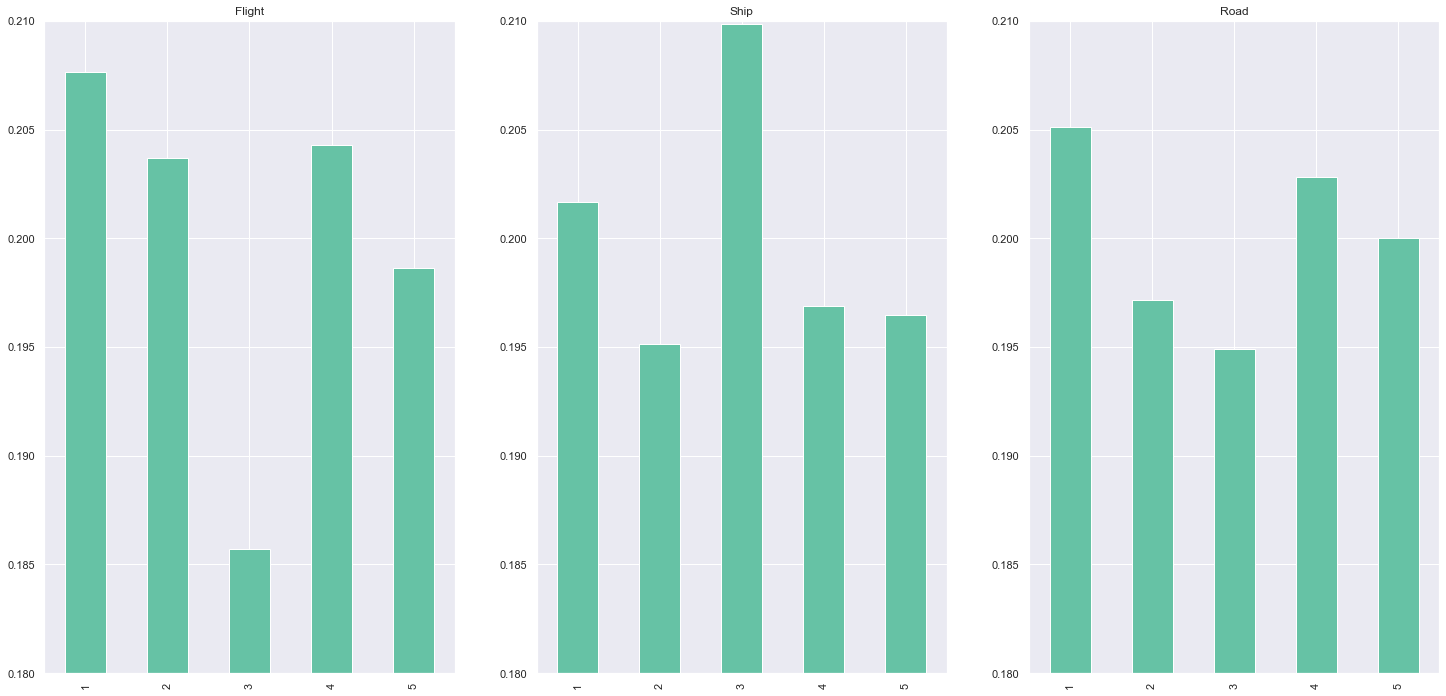

In [68]:
flight = df3[df3["mode_of_shipment"] == 'Flight']
ship = df3[df3["mode_of_shipment"] == 'Ship']
road = df3[df3["mode_of_shipment"] == 'Road']

flight = flight[['customer_rating']].astype('category')
ship = ship[['customer_rating']].astype('category')
road = road[['customer_rating']].astype('category')

print(flight['customer_rating'].value_counts(normalize = True, sort = False))

print(ship['customer_rating'].value_counts(normalize = True, sort = False))

print(road['customer_rating'].value_counts(normalize = True, sort = False))

plt.subplot(1,3,1)
flight['customer_rating'].value_counts(normalize = True, sort = False).plot(kind='bar')
plt.ylim(0.180, 0.210)
plt.title('Flight')

plt.subplot(1,3,2)
ship['customer_rating'].value_counts(normalize = True, sort = False).plot(kind='bar')
plt.ylim(0.180, 0.210)
plt.title('Ship')

plt.subplot(1,3,3)
road['customer_rating'].value_counts(normalize = True, sort = False).plot(kind='bar')
plt.ylim(0.180, 0.210)
plt.title('Road')

plt.show()

In [69]:
# Calculate the fraction of rates greater than 4 for each shipment type
print(pd.pivot_table(data = df3, values = 'customer_rating', columns = 'mode_of_shipment', aggfunc = 'mean'))

len_flight45 = len(flight[flight['customer_rating'].astype('int') >= 4]) 
len_flight = len(flight)
fract_flight = len_flight45/len_flight

len_ship45 = len(ship[ship['customer_rating'].astype('int') >= 4]) 
len_ship = len(ship)
fract_ship = len_ship45/len_ship

len_road45 = len(road[road['customer_rating'].astype('int') >= 4]) 
len_road = len(road)
fract_road = len_road45/len_road

print("\n", 'The fraction of rates greater or equal to 4 for flight shipments are: ', fract_flight )
print("\n", 'The fraction of rates greater or equal to 4 for ship shipments are: ', fract_ship )
print("\n", 'The fraction of rates greater or equal to 4 for road shipments are: ', fract_road )

mode_of_shipment    Flight      Road      Ship
customer_rating   2.982555  2.995455  2.991289

 The fraction of rates greater or equal to 4 for flight shipments are:  0.40292628024760835

 The fraction of rates greater or equal to 4 for ship shipments are:  0.39332618600911284

 The fraction of rates greater or equal to 4 for road shipments are:  0.4028409090909091


### H2 - There are warehouse blocks with better results than the others
**False** The distribuitions of grades by the warehouse blocks are almost the same

<AxesSubplot:xlabel='warehouse_block', ylabel='customer_rating'>

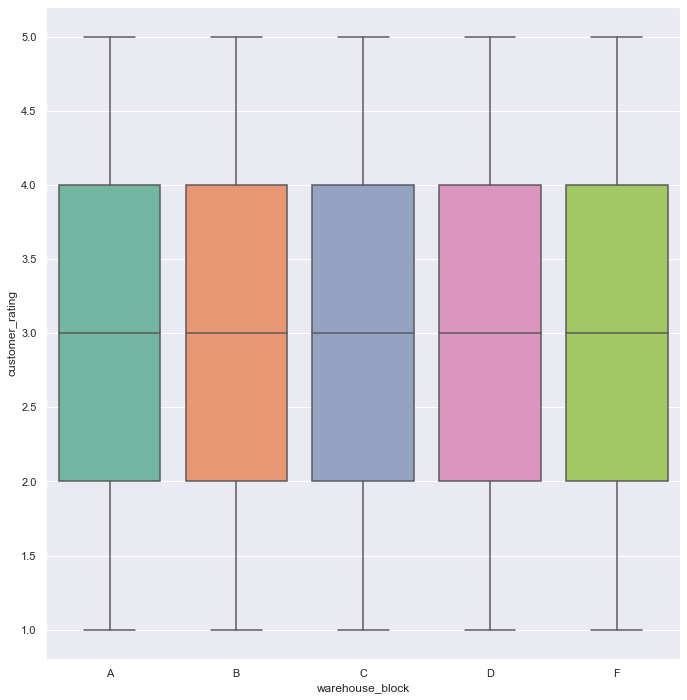

In [29]:
plt.subplot(1,2,1)
sns.boxplot(x = 'warehouse_block', y = 'customer_rating', data = df3)


### H3 - Clients with more prior purchases give better rattings
**True** Here we can see some relationship, clients more faithful tend to give better rates. But it isn't a very strong change.

In [30]:
df3['prior_purchases'].unique() 

array([ 3,  2,  4,  6,  5,  7, 10,  8], dtype=int64)

In [31]:
print(pd.pivot_table(data = df3, values = 'customer_rating', columns = 'prior_purchases', aggfunc = 'mean'))

prior_purchases        2         3         4         5         6         7         8         10
customer_rating  2.955752  2.997977  3.029234  2.941725  3.016043  2.867647  3.039062  3.196629


<AxesSubplot:xlabel='prior_purchases', ylabel='customer_rating'>

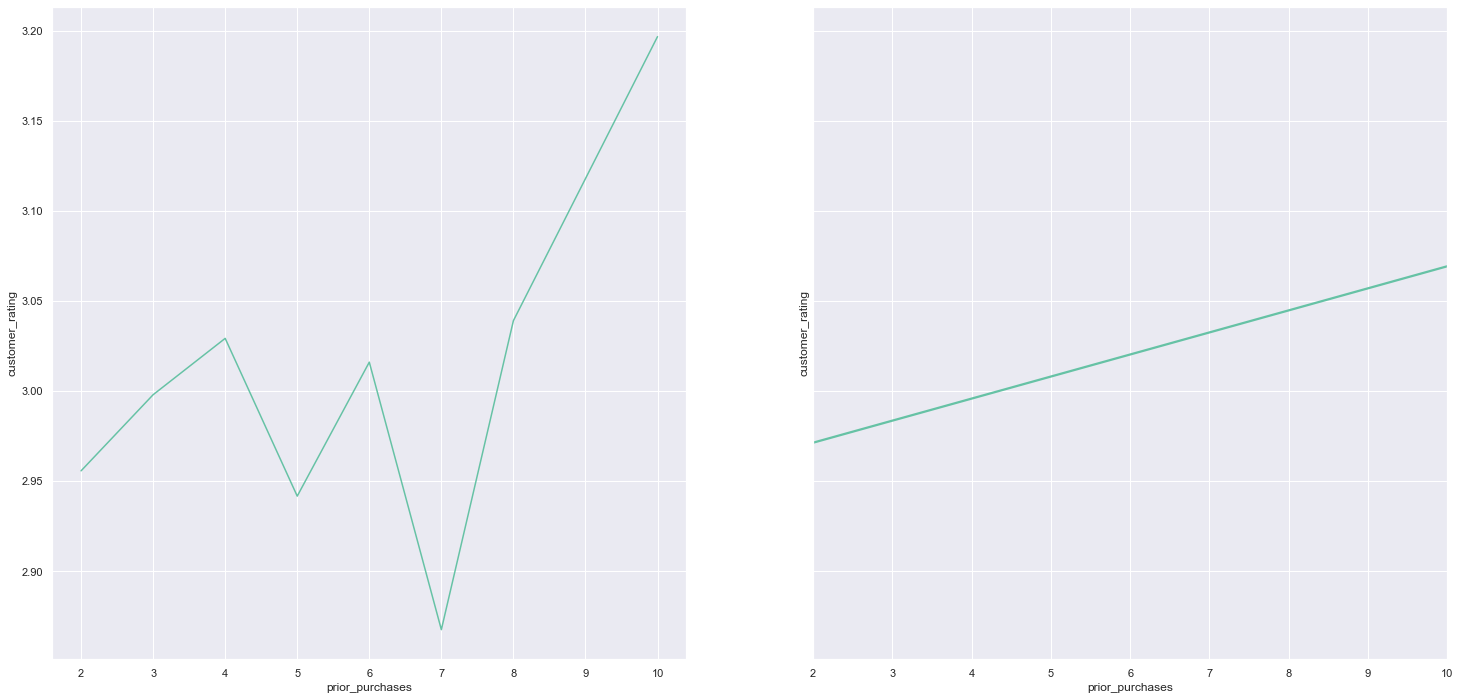

In [32]:
fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, sharey = True)

sns.lineplot(x='prior_purchases' , y= 'customer_rating', data=df3, ci = None, ax = ax0)

sns.regplot(x='prior_purchases' , y= 'customer_rating', data=df3, ci = None, scatter = False, ax = ax1)

### H4 - Man give better ratings than woman
**True** The mean rates from man are a little greater than the woman are, and they also tend to give more Excelent Rates (4 and 5).

In [62]:
man = df3[df3["gender"] == 'M']
woman = df3[df3["gender"] == 'F']

man = man[['customer_rating']].astype('category')
woman = woman[['customer_rating']].astype('category')


In [66]:
print(pd.pivot_table(data = df3, values = 'customer_rating', columns = 'gender', aggfunc = 'mean'))

len_man45 = len(man[man['customer_rating'].astype('int') >= 4]) 
len_man = len(man)
fract_man = len_man45/len_man

len_woman45 = len(woman[woman['customer_rating'].astype('int') >= 4]) 
len_woman = len(woman)
fract_woman = len_woman45/len_woman

print("\n", 'The fraction of rates greater or equal to 4 for man are: ', fract_man )
print("\n", 'The fraction of rates greater or equal to 4 for woman are: ', fract_woman )


gender                  F         M
customer_rating  2.986655  2.994499

 The fraction of rates greater or equal to 4 for man are:  0.3976897689768977

 The fraction of rates greater or equal to 4 for woman are:  0.3951307484220018


2    0.202237
3    0.200953
4    0.200403
1    0.199120
5    0.197286
Name: customer_rating, dtype: float64
1    0.207214
3    0.206132
4    0.197656
5    0.197475
2    0.191524
Name: customer_rating, dtype: float64


Text(0.5, 1.0, 'Woman')

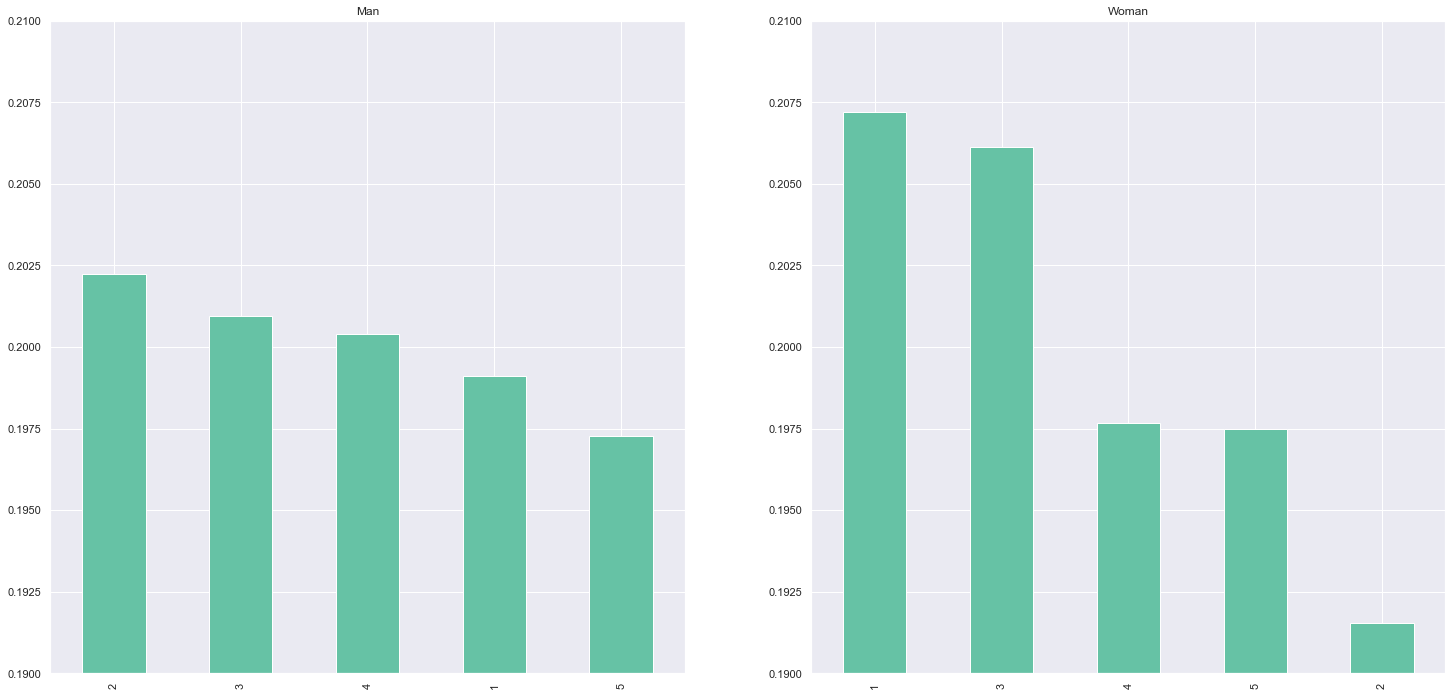

In [67]:
print(man['customer_rating'].value_counts(normalize = True))

print(woman['customer_rating'].value_counts(normalize = True))

plt.subplot(1,2,1)
man['customer_rating'].value_counts(normalize = True).plot(kind = 'bar')
plt.ylim(0.190, 0.210)
plt.title('Man')

plt.subplot(1,2,2)
woman['customer_rating'].value_counts(normalize = True).plot(kind = 'bar')
plt.ylim(0.190, 0.210)
plt.title('Woman')

### H5 - Clients with more cutomer calls give worse ratings
**False** We can see a small tendency showing that clients with more care calls give better rates

In [36]:
print(pd.pivot_table(data = df3, values = 'customer_rating', columns = 'customer_care_calls', aggfunc = 'mean'))

customer_care_calls         2         3         4         5         6         7
customer_rating      3.017241  2.959901  2.998032  2.972938  3.083909  2.995935


<AxesSubplot:xlabel='customer_care_calls', ylabel='customer_rating'>

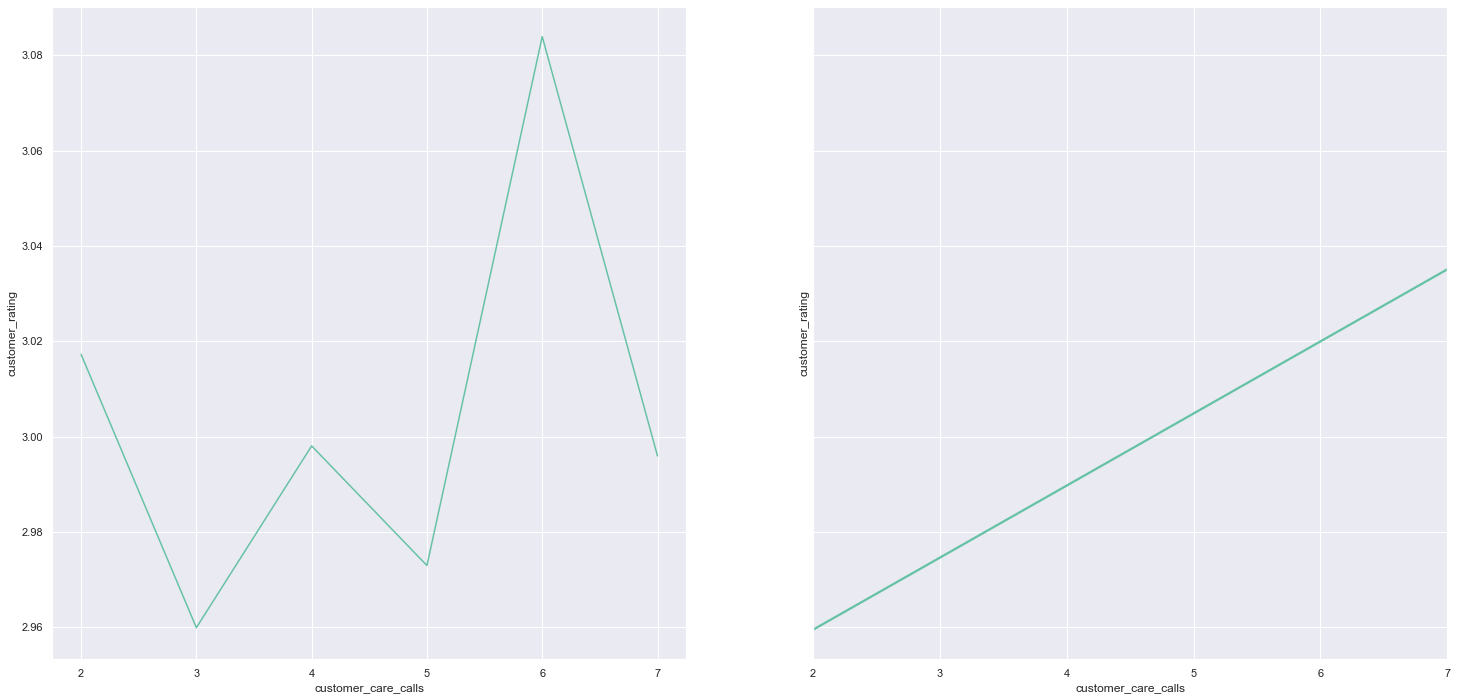

In [37]:
fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, sharey = True)

sns.lineplot(x='customer_care_calls' , y= 'customer_rating', data=df3, ci = None, ax = ax0)

sns.regplot(x='customer_care_calls' , y= 'customer_rating', data=df3, ci = None, scatter = False, ax = ax1)

### H6 - The greater the discount offered are, the better the rates are
**False** We can't see any substancial relationship here, even with the slightly tendency to worsen the rates the bigger the discount offered, but this would also go against our hypothesis
 


In [38]:
#would better rates be given for more expensive products?

print(df3.groupby('customer_rating')['discount_offered'].mean())

customer_rating
1    13.458166
2    13.687760
3    12.979902
4    13.257195
5    13.494703
Name: discount_offered, dtype: float64


<AxesSubplot:xlabel='discount_offered', ylabel='customer_rating'>

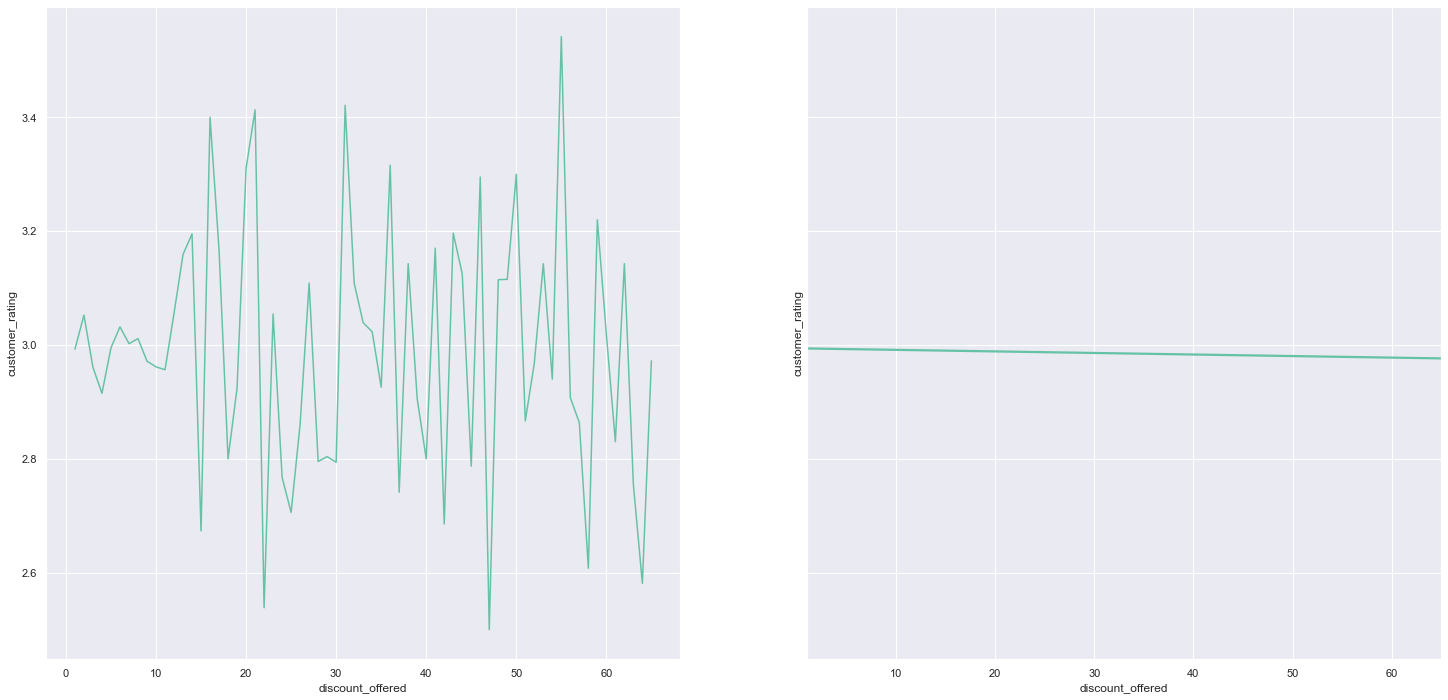

In [39]:
fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, sharey = True)

sns.lineplot(x='discount_offered' , y= 'customer_rating', data=df3, ci = None, ax = ax0)

sns.regplot(x='discount_offered' , y= 'customer_rating', data=df3, ci = None, scatter = False, ax = ax1)

### H7 - More expensive products result in worse ratings?
**Vague** There are a discreet positive influence in the improvement of the rates by the more expensive the product are, but it is too little too confirm the validity of this affirmation, maybe with a data with a greater range of prices we could analyze it better


In [40]:
aux = df3.copy()
aux = aux[cat_columns].astype('category')

customer_rating
1    208.979866
2    211.387067
3    209.384547
4    210.132937
5    211.164901
Name: cost_of_the_product, dtype: float64


<AxesSubplot:xlabel='customer_rating', ylabel='cost_of_the_product'>

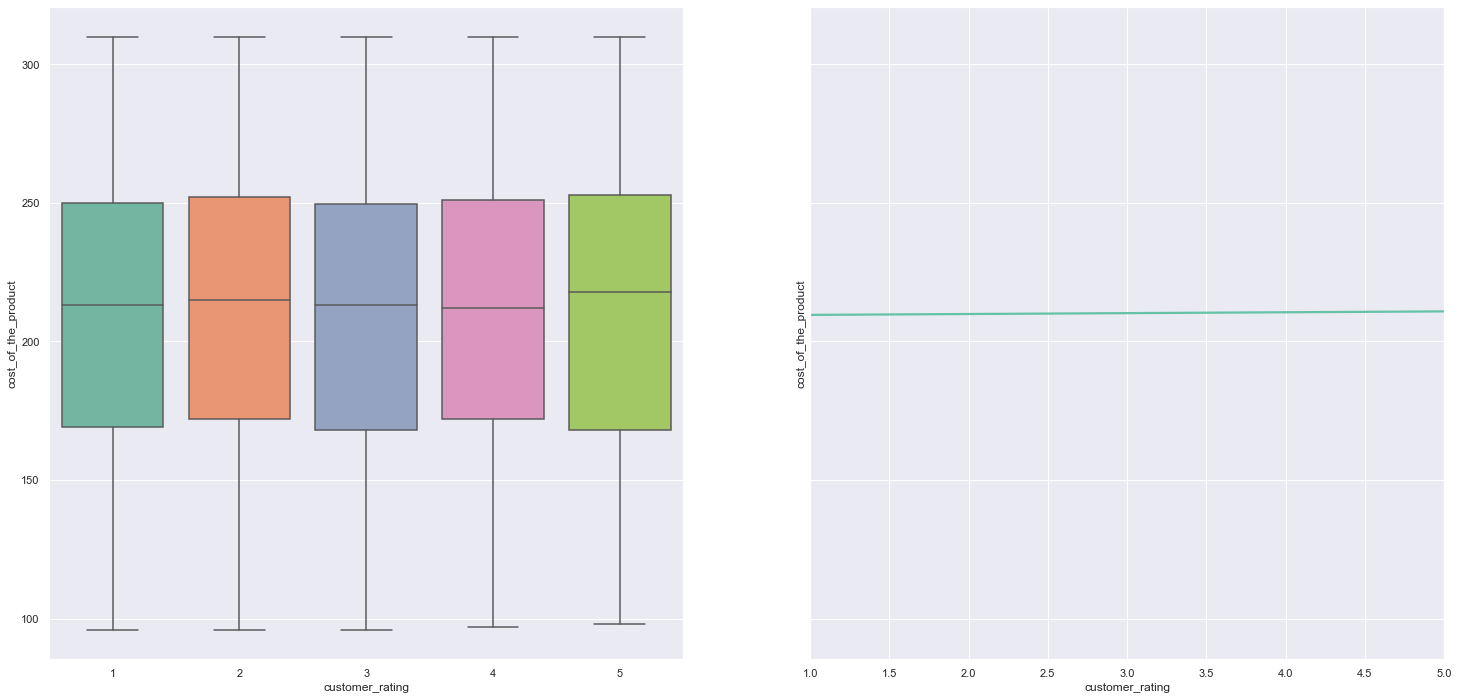

In [41]:
#better rated products are more expensive?

print(df3.groupby('customer_rating')['cost_of_the_product'].mean())

fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, sharey = True)

sns.boxplot(x = 'customer_rating', y = 'cost_of_the_product', data = df3, ax = ax0)
sns.regplot(x='customer_rating' , y= 'cost_of_the_product', data=df3, ci = None, scatter = False, ax = ax1)

<AxesSubplot:xlabel='cost_of_the_product', ylabel='customer_rating'>

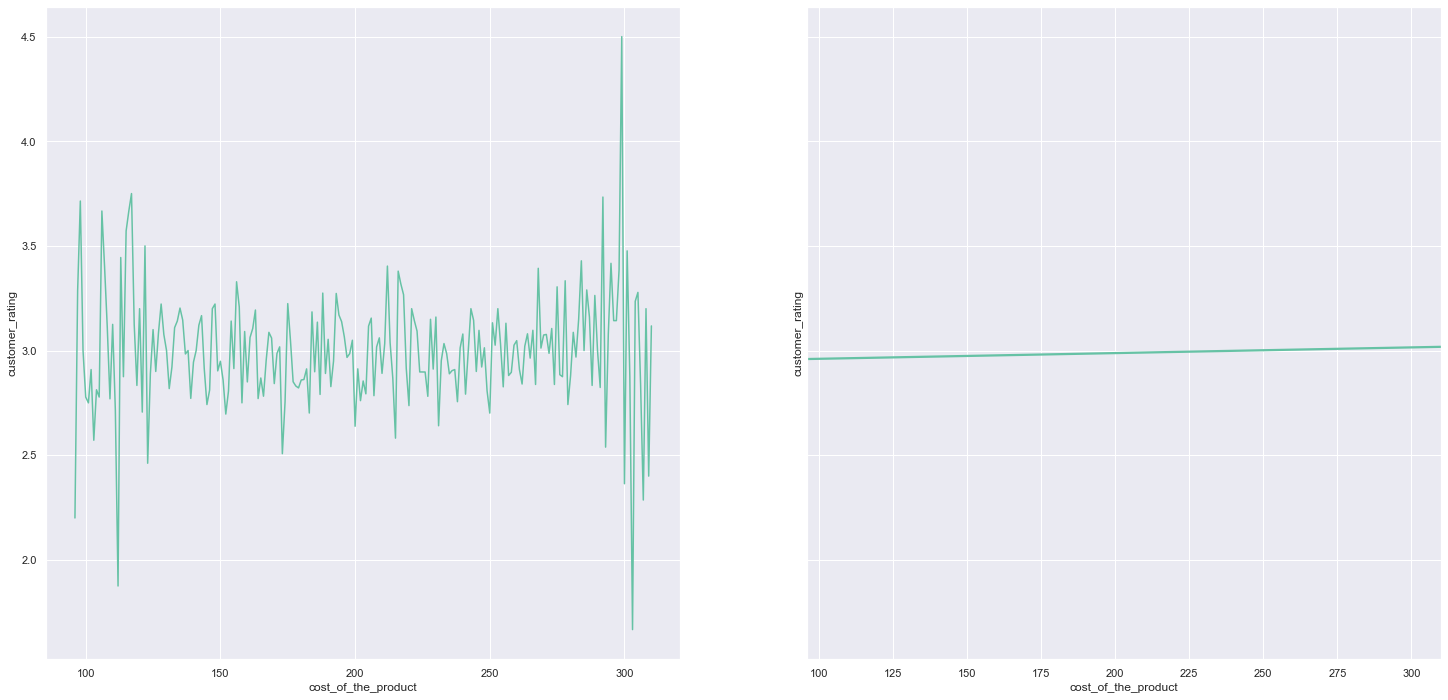

In [42]:
fig, (ax0, ax1) = plt.subplots(nrows = 1, ncols = 2, sharey = True)

sns.lineplot(x='cost_of_the_product' , y= 'customer_rating', data=df3, ci = None, ax = ax0)

sns.regplot(x='cost_of_the_product' , y= 'customer_rating', data=df3, ci = None, scatter = False, ax = ax1)

### H8 - More important products results in better ratings
**Vague** More important products do have more Excelent Rates(4, 5), but they get behind of the medium importance products in the mean rate.

In [58]:
low = df3[df3["product_importance"] == 'low']
medium = df3[df3["product_importance"] == 'medium']
high = df3[df3["product_importance"] == 'high']

low = low[['customer_rating']].astype('category')
medium = medium[['customer_rating']].astype('category')
high = high[['customer_rating']].astype('category')



product_importance
high      2.993671
low       2.983576
medium    2.997686
Name: customer_rating, dtype: float64


2    0.209916
4    0.203586
1    0.196203
5    0.196203
3    0.194093
Name: customer_rating, dtype: float64
3    0.210560
2    0.200042
4    0.196887
5    0.196466
1    0.196045
Name: customer_rating, dtype: float64
1    0.210874
4    0.200113
3    0.198981
5    0.198414
2    0.191618
Name: customer_rating, dtype: float64


Text(0.5, 1.0, 'High')

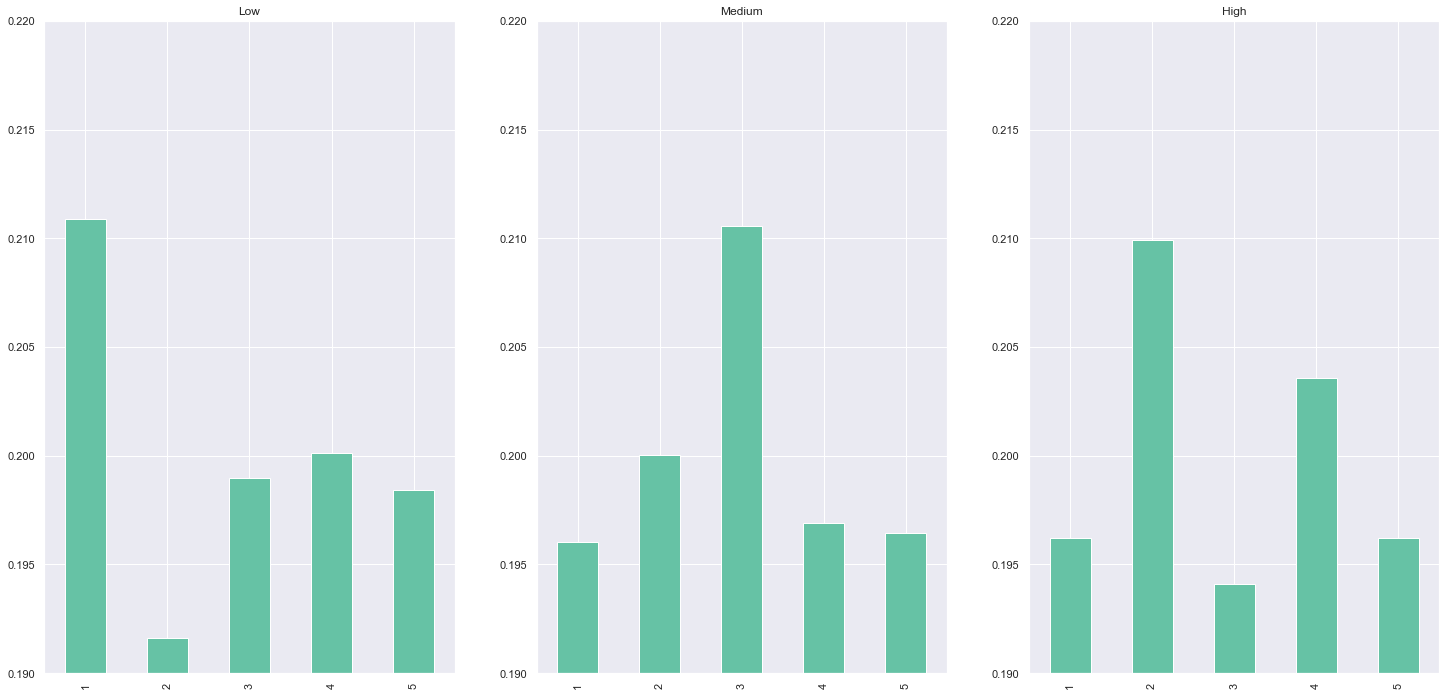

In [74]:
print(high['customer_rating'].value_counts(normalize = True))

print(medium['customer_rating'].value_counts(normalize = True))

print(low['customer_rating'].value_counts(normalize = True))

plt.subplot(1,3,1)
low['customer_rating'].value_counts(normalize = True, sort = False).plot(kind='bar')
plt.ylim(0.190, 0.220)
plt.title('Low')

plt.subplot(1,3,2)
medium['customer_rating'].value_counts(normalize = True, sort = False).plot(kind='bar')
plt.ylim(0.190, 0.220)
plt.title('Medium')

plt.subplot(1,3,3)
high['customer_rating'].value_counts(normalize = True, sort = False).plot(kind='bar')
plt.ylim(0.190, 0.220)
plt.title('High')

In [71]:
# Calculate the fraction of rates greater than 4 for each importence level
print(df3.groupby('product_importance').customer_rating.mean())

len_low45 = len(low[low['customer_rating'].astype('int') >= 4]) 
len_low = len(low)
fract_low = len_low45/len_low

len_medium45 = len(medium[medium['customer_rating'].astype('int') >= 4]) 
len_medium = len(medium)
fract_medium = len_medium45/len_medium

len_high45 = len(high[high['customer_rating'].astype('int') >= 4]) 
len_high = len(high)
fract_high = len_high45/len_high

print("\n", 'The fraction of rates greater or equal to 4 for low importance are: ', fract_low )
print("\n", 'The fraction of rates greater or equal to 4 for medium importance are: ', fract_medium )
print("\n", 'The fraction of rates greater or equal to 4 for high importance are: ', fract_high )


product_importance
high      2.993671
low       2.983576
medium    2.997686
Name: customer_rating, dtype: float64

 The fraction of rates greater or equal to 4 for low importance are:  0.39852746837832737

 The fraction of rates greater or equal to 4 for medium importance are:  0.3933529659234329

 The fraction of rates greater or equal to 4 for high importance are:  0.399789029535865


### H9 - Products that reach on time have better ratings
**False** Unlike we'd think, products that reached on time have worse rates and less Excelent Rates (4, 5) than products that didn't reach on time.

In [79]:
yes = df3[df3['reached.on.time_y.n'] == 'Yes']
no = df3[df3["reached.on.time_y.n"] == 'Not']

yes = yes[['customer_rating']].astype('category')
no = no[['customer_rating']].astype('category')

1    0.207845
2    0.201082
4    0.199729
3    0.198828
5    0.192516
Name: customer_rating, dtype: float64
3    0.206765
5    0.200670
1    0.200061
4    0.198537
2    0.193966
Name: customer_rating, dtype: float64


Text(0.5, 1.0, 'Did not reach on time')

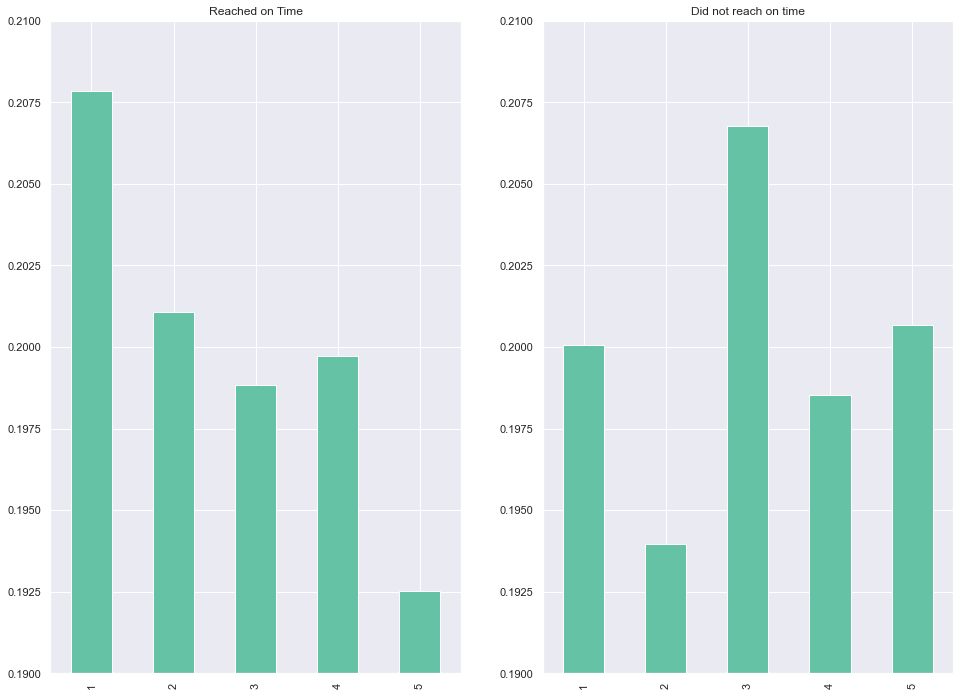

In [84]:
print(yes['customer_rating'].value_counts(normalize = True))

print(no['customer_rating'].value_counts(normalize = True))

plt.subplot(1,3,1)
yes['customer_rating'].value_counts(normalize = True, sort = False).plot(kind='bar')
plt.ylim(0.190, 0.210)
plt.title('Reached on Time')

plt.subplot(1,3,2)
no['customer_rating'].value_counts(normalize = True, sort = False).plot(kind='bar')
plt.ylim(0.190, 0.210)
plt.title('Did not reach on time')


In [83]:
# Calculate the fraction of rates greater than 4 for possibility
print(df3.groupby('reached.on.time_y.n').customer_rating.mean())

len_yes45 = len(yes[yes['customer_rating'].astype('int') >= 4]) 
len_yes = len(yes)
fract_yes = len_yes45/len_yes

len_no45 = len(no[no['customer_rating'].astype('int') >= 4]) 
len_no = len(no)
fract_no = len_no45/len_no

print("\n", 'The fraction of rates greater or equal to 4 for the products the reached on time is: ', fract_yes )
print("\n", 'The fraction of rates greater or equal to 4 for the products the did not reach on time is: ', fract_no )


reached.on.time_y.n
Yes    2.967989
Not    3.005790
Name: customer_rating, dtype: float64

 The fraction of rates greater or equal to 4 for the products the reached on time is:  0.39224526600541026

 The fraction of rates greater or equal to 4 for the products the did not reach on time is:  0.3992076794149017


## 3.3 Analise Multivarida

### 3.3.1 Numerical Attributes

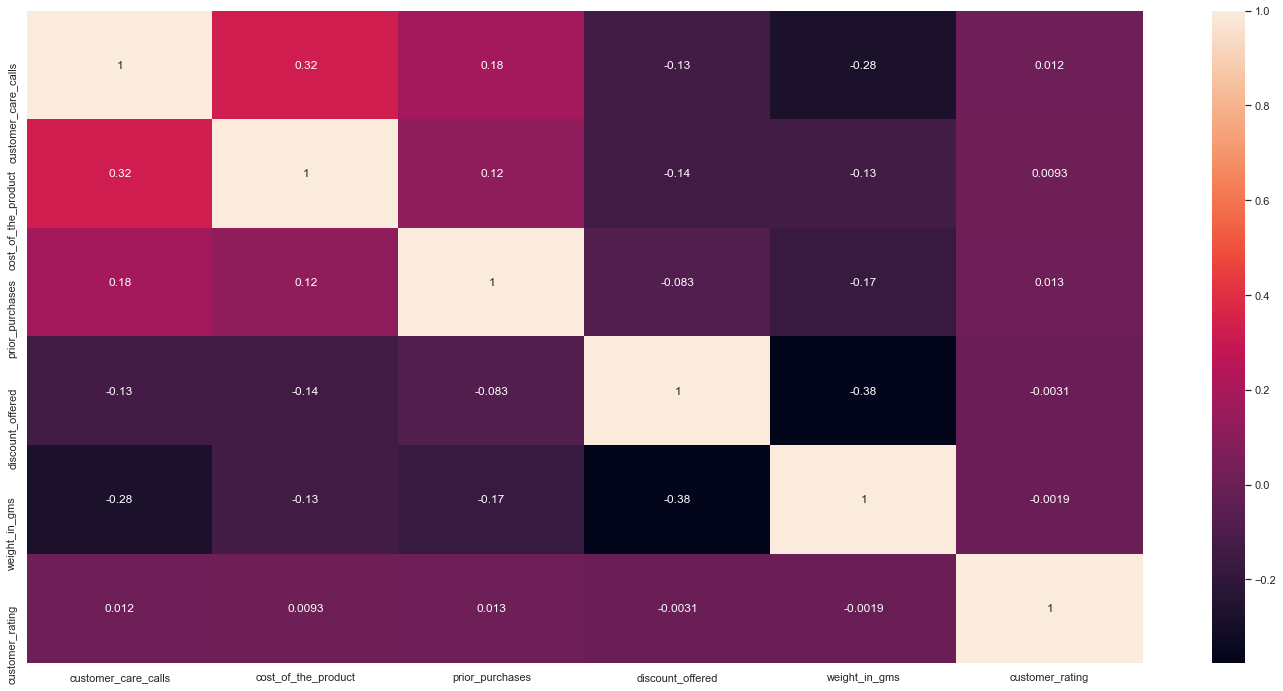

In [89]:
correlation = num_attributes.corr(method = 'pearson')
sns.heatmap(correlation, annot = True);

### 3.3.2 Categorical Attributes

In [98]:
#only cattegorical data
a = df3.select_dtypes(include = 'category')

#calculate Cramer V
a1 = cramer_v(a['warehouse_block'], a['warehouse_block'])
a2 = cramer_v(a['warehouse_block'], a['mode_of_shipment'])
a3 = cramer_v(a['warehouse_block'], a['product_importance'])
a4 = cramer_v(a['warehouse_block'], a['gender'])
a5 = cramer_v(a['warehouse_block'], a['reached.on.time_y.n'])
a6 = cramer_v(a['warehouse_block'], df3['customer_rating'])

a7 = cramer_v(a['mode_of_shipment'], a['warehouse_block'])
a8 = cramer_v(a['mode_of_shipment'], a['mode_of_shipment'])
a9 = cramer_v(a['mode_of_shipment'], a['product_importance'])
a10 = cramer_v(a['mode_of_shipment'], a['gender'])
a11 = cramer_v(a['mode_of_shipment'], a['reached.on.time_y.n'])
a12 = cramer_v(a['mode_of_shipment'], df3['customer_rating'])

a13 = cramer_v(a['product_importance'], a['warehouse_block'])
a14 = cramer_v(a['product_importance'], a['mode_of_shipment'])
a15 = cramer_v(a['product_importance'], a['product_importance'])
a16 = cramer_v(a['product_importance'], a['gender'])
a17 = cramer_v(a['product_importance'], a['reached.on.time_y.n'])
a18 = cramer_v(a['product_importance'], df3['customer_rating'])

a19 = cramer_v(a['gender'], a['warehouse_block'])
a20 = cramer_v(a['gender'], a['mode_of_shipment'])
a21 = cramer_v(a['gender'], a['product_importance'])
a22 = cramer_v(a['gender'], a['gender'])
a23 = cramer_v(a['gender'], a['reached.on.time_y.n'])
a24 = cramer_v(a['gender'], df3['customer_rating'])

a25 = cramer_v(a['reached.on.time_y.n'], a['warehouse_block'])
a26 = cramer_v(a['reached.on.time_y.n'], a['mode_of_shipment'])
a27 = cramer_v(a['reached.on.time_y.n'], a['product_importance'])
a28 = cramer_v(a['reached.on.time_y.n'], a['gender'])
a29 = cramer_v(a['reached.on.time_y.n'], a['reached.on.time_y.n'])
a30 = cramer_v(a['reached.on.time_y.n'], df3['customer_rating'])

a31 = cramer_v(df3['customer_rating'], a['warehouse_block'])
a32 = cramer_v(df3['customer_rating'], a['mode_of_shipment'])
a33 = cramer_v(df3['customer_rating'], a['product_importance'])
a34 = cramer_v(df3['customer_rating'], a['gender'])
a35 = cramer_v(df3['customer_rating'], a['reached.on.time_y.n'])
a36 = cramer_v(df3['customer_rating'], df3['customer_rating'])

#final dataset
d = pd.DataFrame({'warehouse_block':[a1, a2, a3, a4, a5, a6],
             'mode_of_shipment':[a7, a8, a9, a10, a11, a12],
             'product_importance':[a13, a14, a15, a16, a17, a18],
             'gender':[a19, a20, a21, a22, a23, a24],
             'reached.on.time_y.n':[a25, a26, a27, a28, a29, a30],
             'customer_rating':[a31, a32, a33, a34, a35, a36]})

d = d.set_index(d.columns)

d

,warehouse_block,mode_of_shipment,product_importance,gender,reached.on.time_y.n,customer_rating
warehouse_block,1.000182,0.001045,0.019140,0.008654,0.009951,0.015085
mode_of_shipment,0.001045,1.000091,0.010043,0.018211,0.008221,0.017025
product_importance,0.019140,0.010043,1.000091,0.010020,0.033321,0.018053
gender,0.008654,0.018211,0.010020,0.999864,0.004503,0.016395
reached.on.time_y.n,0.009951,0.008221,0.033321,0.004503,0.999857,0.017057
customer_rating,0.015085,0.017025,0.018053,0.016395,0.017057,1.000182


<AxesSubplot:>

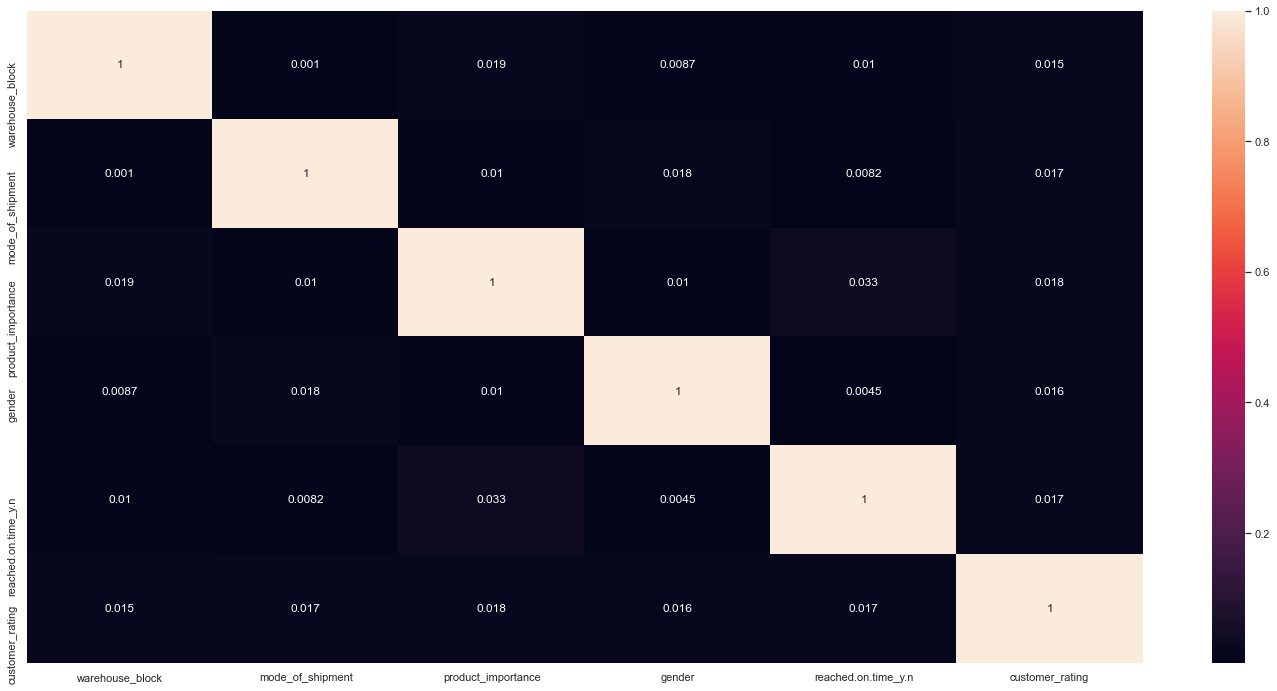

In [99]:
sns.heatmap(d, annot = True)